![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Business Challenge: Cohort Analysis for Ironhack Payments (Project 1)

## Introduction

IronHack Payments, a forward-thinking financial services company, has been offering innovative cash advance solutions since its inception in 2020. With a commitment to providing money advancements for free and transparent pricing, IronHack Payments has garnered a substantial user base. As part of their continuous effort to enhance their services and understand user behavior, IronHack Payments has commissioned a cohort analysis project.

## Project Overview

In this project, you will conduct a comprehensive cohort analysis based on data provided by IronHack Payments. The main objective is to analyze user cohorts defined by the month of creation of their first cash advance. You will track the monthly evolution of key metrics for these cohorts, enabling IronHack Payments to gain valuable insights into user behavior and the performance of their financial services.

### Metrics to Analyze

You will calculate and analyze the following metrics for each cohort:

1. **Frequency of Service Usage:** Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
2. **Incident Rate:** Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.
3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
4. **New Relevant Metric:** Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

### Data Analysis Tools

You are expected to perform the cohort analysis using Python, primarily leveraging the Pandas library for data manipulation and analysis. However, the main analysis should be conducted using Python.

### Exploratory Data Analysis (EDA)

Before diving into cohort analysis, conduct an exploratory data analysis to gain a comprehensive understanding of the dataset. Explore key statistics, distributions, and visualizations to identify patterns and outliers. EDA will help you make informed decisions on data preprocessing and analysis strategies.

### Data Quality Analysis

Assess the quality of the dataset by identifying missing values, data inconsistencies, and potential errors. Implement data cleaning and preprocessing steps to ensure the reliability of your analysis. Document any data quality issues encountered and the steps taken to address them.

### Deliverables

1. **Python Code:** Provide well-documented Python code that conducts the cohort analysis, including data loading, preprocessing, cohort creation, metric calculation, and visualization.
2. **Tableau Dashboard**: Publish a dashboard in Tableau Public regarding your analysis.
3. **Exploratory Data Analysis Report:** Prepare a report summarizing the findings from your exploratory data analysis. Include visualizations and insights that help understand the dataset.
4. **Data Quality Analysis Report:** Document the results of your data quality analysis, highlighting any issues and the steps taken to resolve them.
5. **Short Presentation:** Create a concise presentation (maximum of 4 slides) summarizing your findings from the cohort analysis and key insights gained from EDA and data quality analysis. This presentation should be suitable for sharing with the IronHack Payments team.
   
### Bonus:
1. **Operationalize your analysis**: Make sure all the code is in a .py that can be called from the Terminal and whose execution makes sense (if in doubt, ask the Teacher for clarification on this)
2. **StreamLit**: Read about the StreamLit package and create a StreamLit app about this data (you can leverage on ideias from your dashboard)
3. **OPP vs Function**: Take your code and replicate it using an oposite strategy than you have done.

<!-- this version uses Tableau which consorci doesn't use -->

<!-- https://github.com/ironhack-labs/project-1-ironhack-payments-2-en -->


In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


In [423]:
#read pd
file_paths = [r"./project_dataset/extract - cash request - data analyst.csv",r"./project_dataset/extract - fees - data analyst - .csv"]

cashreq_df = pd.read_csv(file_paths[0])
fees_df = pd.read_csv(file_paths[1])


cashreq_df_copy = cashreq_df.copy()

In [424]:
cashreq_df.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [425]:
cashreq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [426]:
# Identify potential date columns based on column names and data types
date_columns = [col for col in cashreq_df.columns if 'date' in col.lower() or 'time' in col.lower() or pd.api.types.is_object_dtype(cashreq_df[col])]

for col in date_columns:
    try:
        cashreq_df[col] = pd.to_datetime(cashreq_df[col], errors='coerce').dt.strftime('%m/%d/%Y')
    except Exception as e:
        print(f"Could not process column {col}: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_27976\727240225.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cashreq_df[col] = pd.to_datetime(cashreq_df[col], errors='coerce').dt.strftime('%m/%d/%Y')
C:\Users\User\AppData\Local\Temp\ipykernel_27976\727240225.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cashreq_df[col] = pd.to_datetime(cashreq_df[col], errors='coerce').dt.strftime('%m/%d/%Y')
C:\Users\User\AppData\Local\Temp\ipykernel_27976\727240225.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cashreq_df[col] = pd.to_datetime(cashreq_df[col], errors='coerce'

In [427]:
# Convert specified columns to string type
cashreq_df[['id', 'user_id', 'deleted_account_id']] = cashreq_df[['id', 'user_id', 'deleted_account_id']].astype('string')

# Extract date from the 'created_at' column and assign it to the variable 'created_date'
def extract_created_date(df, column_name):
    """
    Extracts the date from the specified column and assigns it to the 'created_date' variable.

    Parameters:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column to extract the date from.

    Returns:
    DataFrame: Updated DataFrame with a new column 'created_date'.
    """
    df['created_date'] = pd.to_datetime(df[column_name], errors='coerce').dt.strftime('%m-%d-%Y')
    return df

# Apply the function to extract the date
cashreq_df = extract_created_date(cashreq_df, 'created_at')

# Sort the data by user_id and created_date in ascending order
cashreq_df['created_date'] = pd.to_datetime(cashreq_df['created_date'], errors='coerce')
cashreq_df = cashreq_df.sort_values(by=['user_id', 'created_date'], ascending=True)

# Assign the cohort based on the earliest transaction's month name for each user_id
cashreq_df['cohort'] = cashreq_df.groupby('user_id')['created_date'].transform(
    lambda x: x.min().strftime('%B') if pd.notnull(x.min()) else None
)

## Cohort Distribution

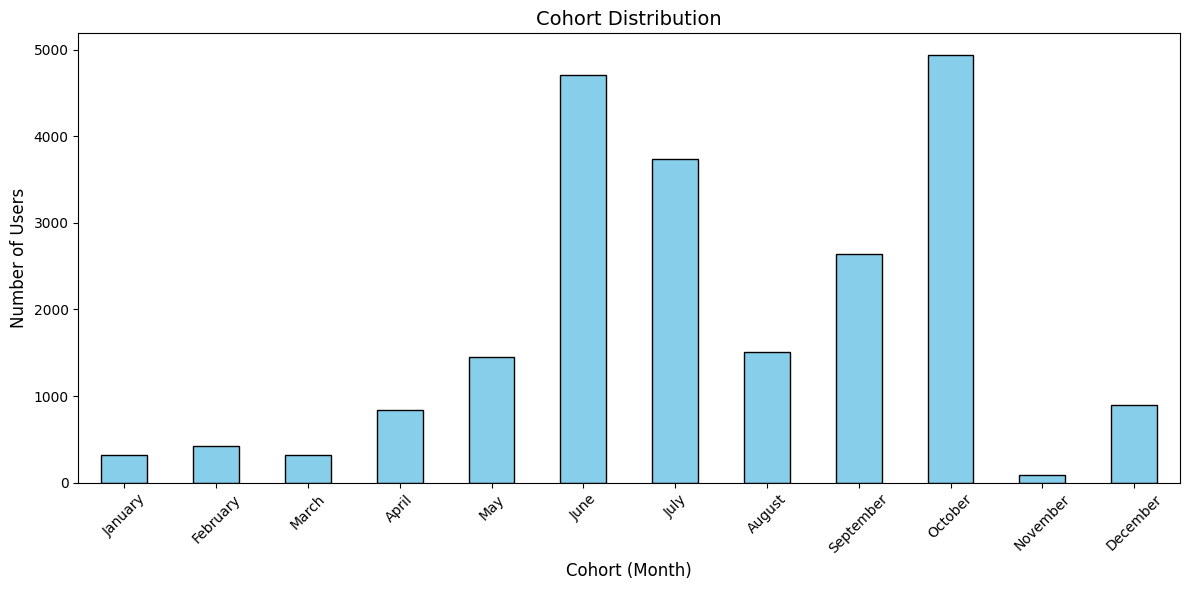

In [428]:
cohort_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
cohort_counts = cashreq_df['cohort'].value_counts()
cohort_counts = cohort_counts.reindex(cohort_order, fill_value=0)

plt.figure(figsize=(12, 6))
cohort_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cohort Distribution', fontsize=14)
plt.xlabel('Cohort (Month)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Transaction Amount

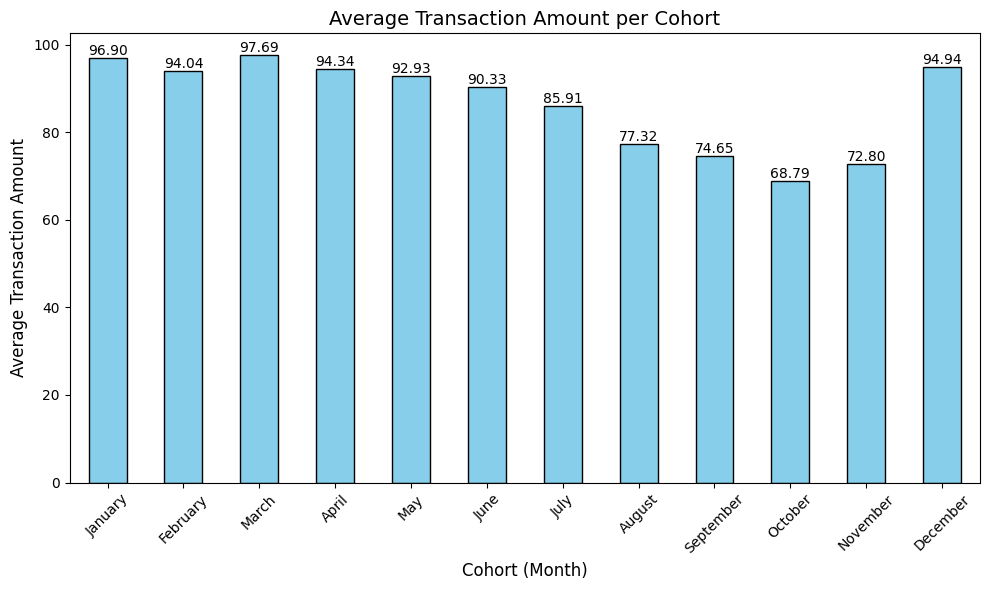

In [429]:
# Calculate and display average transaction amount per cohort
average_amount_per_cohort = cashreq_df.groupby('cohort')['amount'].mean().reindex(cohort_order, fill_value=0)

plt.figure(figsize=(10, 6))
bars = average_amount_per_cohort.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Transaction Amount per Cohort', fontsize=14)
plt.xlabel('Cohort (Month)', fontsize=12)
plt.ylabel('Average Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for bar in bars.containers[0]:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()


## Transfer Type by Status (Percentage)

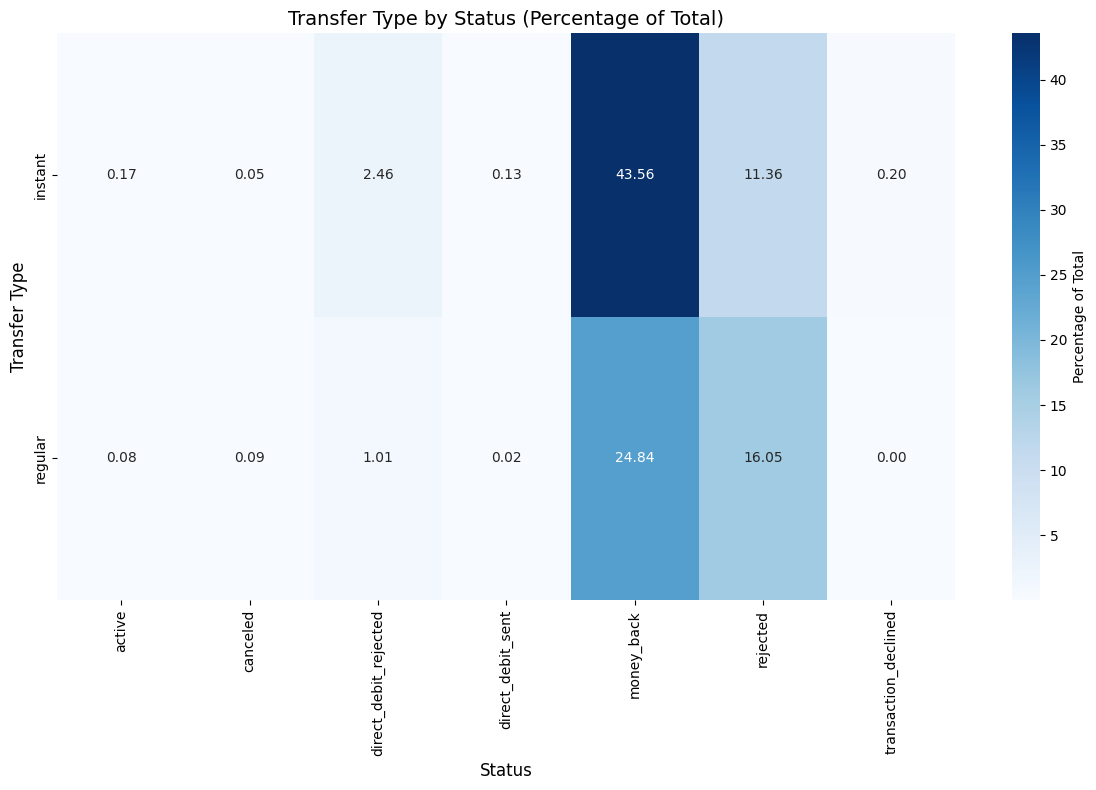

In [433]:
# Create a cross-tabulation for Transfer Type by Status
transfer_status_crosstab = pd.crosstab(
    cashreq_df_copy['transfer_type'],
    cashreq_df_copy['status'],
    rownames=['Transfer Type'],
    colnames=['Status']
)

# Check if the crosstab has data
if not transfer_status_crosstab.empty:
    # Convert crosstab to total percentages
    transfer_status_total_percentage = (transfer_status_crosstab / transfer_status_crosstab.values.sum()) * 100

    # Plot the crosstab as a heatmap with total percentages
    plt.figure(figsize=(12, 8))
    sns.heatmap(transfer_status_total_percentage, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Percentage of Total'})
    plt.title('Transfer Type by Status (Percentage of Total)', fontsize=14)
    plt.xlabel('Status', fontsize=12)
    plt.ylabel('Transfer Type', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Transfer Type by Status heatmap.")


## Transfer Type by Status (Percentage of Total)

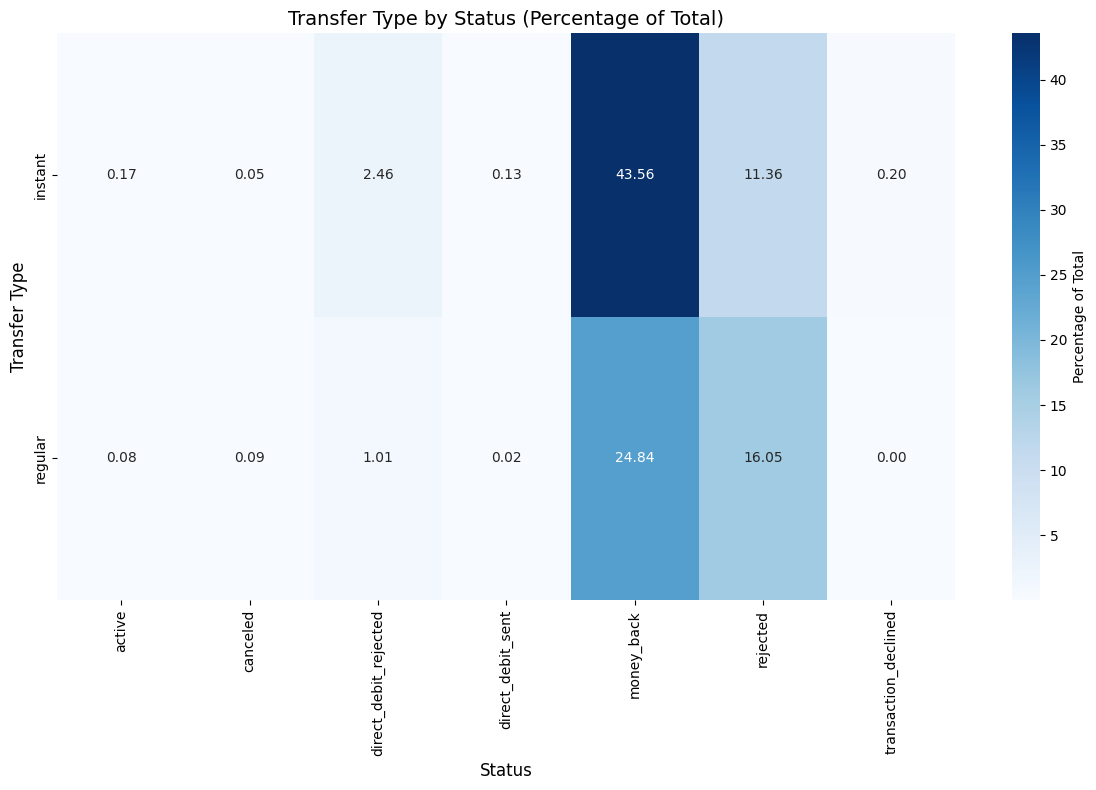

In [434]:
# Create a cross-tabulation for Transfer Type by Status
# Create a crosstab for transfer_type and status
transfer_status_crosstab = pd.crosstab(
    cashreq_df_copy['transfer_type'],
    cashreq_df_copy['status'],
    rownames=['Transfer Type'],
    colnames=['Status']
)

# Convert crosstab to total percentages
transfer_status_total_percentage = (transfer_status_crosstab / transfer_status_crosstab.values.sum()) * 100

# Plot the crosstab as a heatmap with total percentages
plt.figure(figsize=(12, 8))
sns.heatmap(transfer_status_total_percentage, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Percentage of Total'})
plt.title('Transfer Type by Status (Percentage of Total)', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Transfer Type', fontsize=12)
plt.tight_layout()
plt.show()

In [448]:
import pandas as pd

# Ensure the 'created_date' column is in datetime format
cashreq_df['created_date'] = pd.to_datetime(cashreq_df['created_date'], errors='coerce')

# Define the function to calculate service usage frequency for each group
def calculate_serv_freq(group):
    """
    Calculate the frequency of service usage for each cohort.

    Parameters:
    group (DataFrame): A grouped DataFrame for a specific cohort.

    Returns:
    float: Transactions per day for each cohort.
    """
    num_transactions = len(group)  # Total number of transactions
    # Total active period in days, adding 1 to avoid division by zero for single-day cohorts
    time_period = (group["created_date"].max() - group["created_date"].min()).days + 1
    return num_transactions / time_period  # Transactions per day

# Group the data by 'cohort' and calculate frequency service usage
frequency = (
    cashreq_df.groupby("cohort")
    .apply(calculate_serv_freq)  # Apply the frequency calculation
    .reset_index(name="frequency")  # Reset index and name the column 'frequency'
)


C:\Users\User\AppData\Local\Temp\ipykernel_27976\3366418207.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_serv_freq)  # Apply the frequency calculation


## Frequency of Service Usage by Cohort

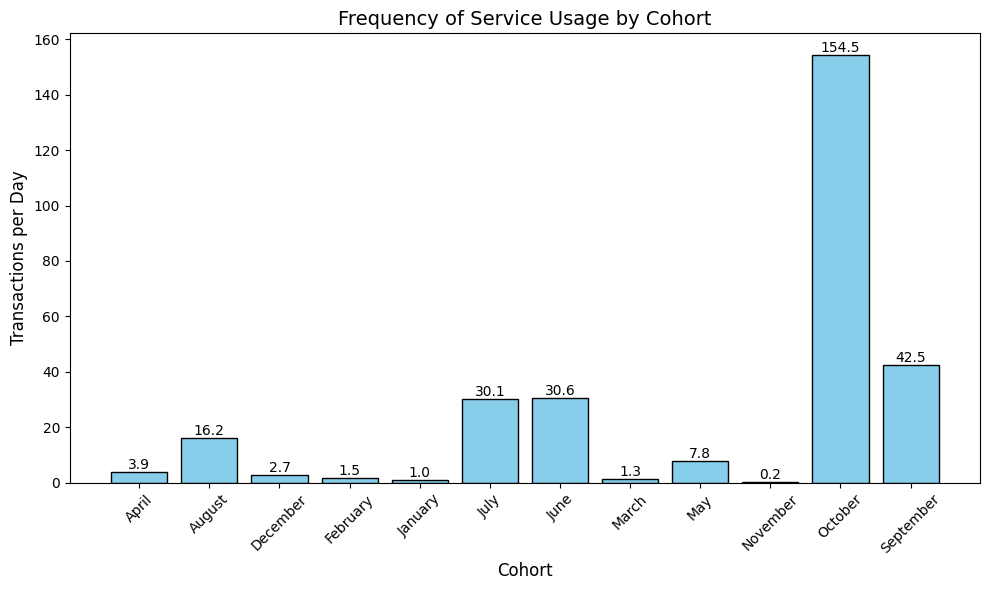

In [449]:
# Plot the frequency of service usage
plt.figure(figsize=(10, 6))
bars = plt.bar(frequency['cohort'], frequency['frequency'], color='skyblue', edgecolor='black')

# Add numbers on top of the bars (rounded to 1 decimal place)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.title('Frequency of Service Usage by Cohort', fontsize=14)
plt.xlabel('Cohort', fontsize=12)
plt.ylabel('Transactions per Day', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

## Total Revenue by Cohort

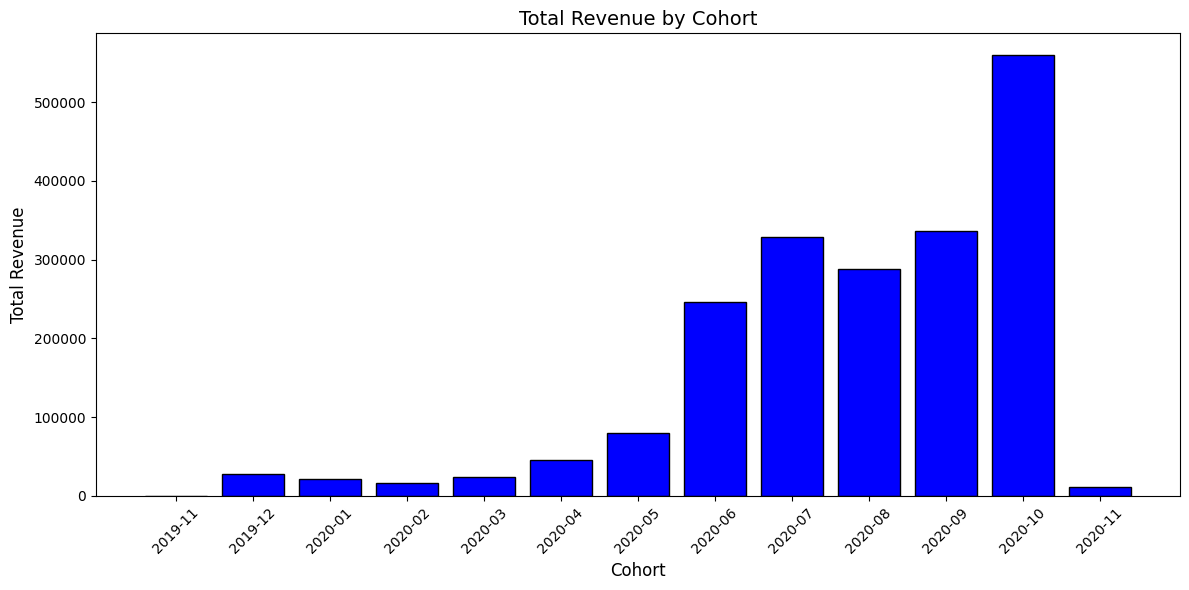

In [462]:

# Ensure 'created_date' is in datetime format
cashreq_df['created_date'] = pd.to_datetime(cashreq_df['created_at'], errors='coerce')

# Assign cohorts based on 'created_date'
cashreq_df['cohort'] = cashreq_df['created_date'].dt.to_period('M')

# Calculate revenue by cohort
revenue_by_cohort = (
    cashreq_df
    .groupby('cohort')
    .agg(
        total_revenue=('amount', 'sum'),  # Summing up the 'amount' column for revenue
        total_transactions=('amount', 'count')  # Count of transactions per cohort
    )
    .reset_index()
)


plt.figure(figsize=(12, 6))
plt.bar(revenue_by_cohort['cohort'].astype(str), revenue_by_cohort['total_revenue'], color='blue', edgecolor='black')
plt.title('Total Revenue by Cohort', fontsize=14)
plt.xlabel('Cohort', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Revenue Per User (ARPU) by Cohort

Text(0, 0.5, 'ARPU')

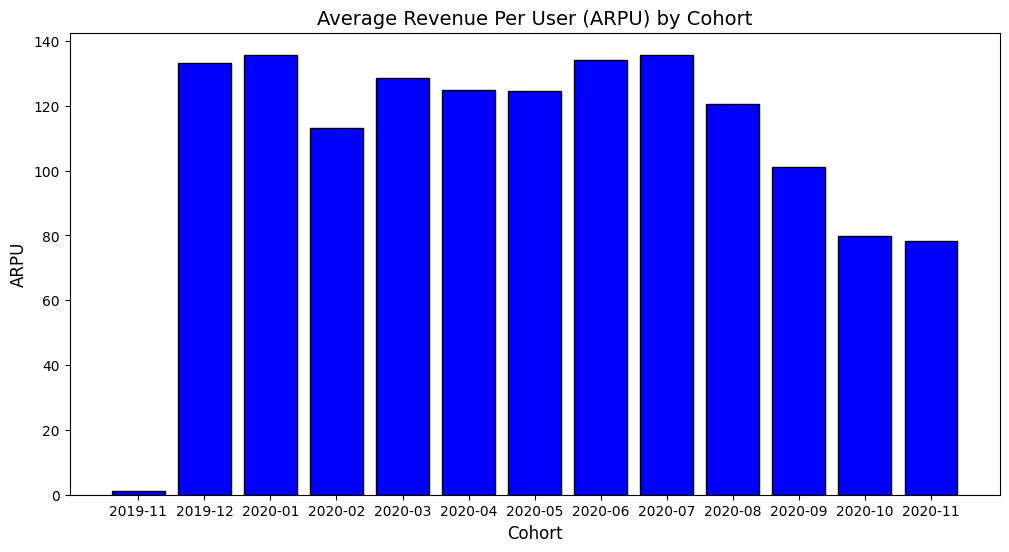

In [465]:
# Ensure 'created_date' is in datetime format
cashreq_df['created_date'] = pd.to_datetime(cashreq_df['created_at'], errors='coerce')

# Assign cohorts based on 'created_date'
cashreq_df['cohort'] = cashreq_df['created_date'].dt.to_period('M')

# Calculate total revenue and total users by cohort
cohort_summary = (
    cashreq_df
    .groupby('cohort')
    .agg(
        total_revenue=('amount', 'sum'),  # Sum of revenue for each cohort
        total_users=('user_id', 'nunique')  # Unique user count for each cohort
    )
    .reset_index()
)

# Calculate Average Revenue Per User (ARPU)
cohort_summary['avg_revenue_per_user'] = cohort_summary['total_revenue'] / cohort_summary['total_users']

# Visualize ARPU by cohort
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(cohort_summary['cohort'].astype(str), cohort_summary['avg_revenue_per_user'], color='blue', edgecolor='black')
plt.title('Average Revenue Per User (ARPU) by Cohort', fontsize=14)
plt.xlabel('Cohort', fontsize=12)
plt.ylabel('ARPU', fontsize = 12)
